In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ticker = "NVDA"
api_key = "IF34367LP8LME7BE"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&apikey={api_key}&datatype=csv"
data = pd.read_csv(url)
print(data)

     timestamp     open    high       low   close     volume
0   2025-07-15  171.190  172.40  169.1950  170.70  230627350
1   2025-07-14  165.370  165.49  162.0200  164.07  136975754
2   2025-07-11  163.715  167.89  163.4700  164.92  193633263
3   2025-07-10  164.320  164.50  161.6100  164.10  167704075
4   2025-07-09  161.220  164.42  161.1600  162.88  183656443
..         ...      ...     ...       ...     ...        ...
95  2025-02-26  129.985  133.73  128.4900  131.28  322553814
96  2025-02-25  129.980  130.20  124.4400  126.63  271428711
97  2025-02-24  136.560  138.59  130.0800  130.28  251381137
98  2025-02-21  140.040  141.46  134.0300  134.43  228217585
99  2025-02-20  140.030  140.66  136.7901  140.11  143903583

[100 rows x 6 columns]


In [20]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp')

data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek
data.drop(columns=['timestamp'], inplace=True)

In [21]:
data['close_lag_1'] = data['close'].shift(1)
data['close_lag_2'] = data['close'].shift(2)

In [22]:
data = data.dropna()

In [23]:
X = data.drop(columns=['close'])
y = data['close']

In [24]:
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [25]:
print(X.dtypes)

open           float64
high           float64
low            float64
volume           int64
year             int32
month            int32
day              int32
dayofweek        int32
close_lag_1    float64
close_lag_2    float64
dtype: object


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [28]:
# Model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.8678
RMSE: 1.0751
R² Score: 0.9816


In [29]:
# Model parameters
print("Intercept:", model.intercept_)
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coef_df)

Intercept: 119.69565789473685

Feature Coefficients:
        Feature   Coefficient
0         open -1.002676e+01
1         high  1.106959e+01
2          low  1.242091e+01
3       volume  9.905132e-02
4         year -3.552714e-15
5        month  1.452529e-01
6          day  9.954138e-03
7    dayofweek  1.448921e-01
8  close_lag_1  1.143314e+00
9  close_lag_2 -1.277451e+00


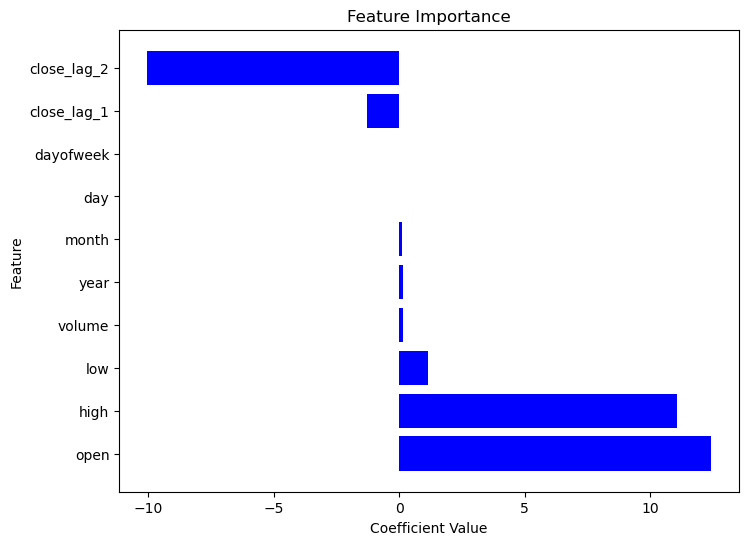

In [30]:
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

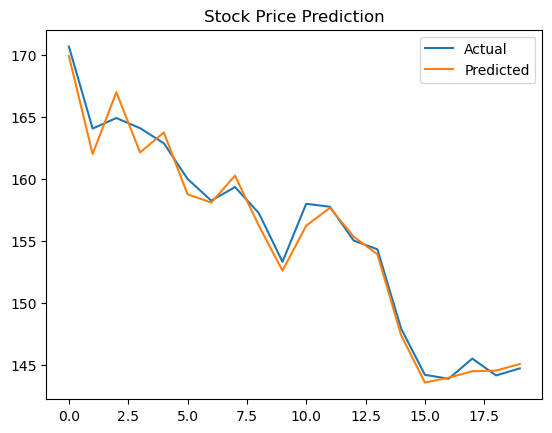

In [31]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()